# Speed and Structure challenge
### Racing to Uncover Earth's Subsurface 🏎️💨

Get ready to rev your engines and race to the subsurface! Welcome to the Speed and Structure challenge, an exhilarating journey that puts you in the driver's seat to pioneer cutting-edge techniques for seismic velocity inversion.

Your mission? To construct high-resolution models of subsurface velocities directly from seismic data. Imagine yourself as a high-tech cartographer of the underworld, transforming complex seismic signals—the very echoes of our planet—into detailed velocity maps. By doing so, you'll be unlocking invaluable insights into the Earth's hidden architecture, revealing geological formations crucial for everything from resource exploration to hazard assessment. This isn't just about listening to the Earth; it's about understanding its intricate inner workings with incredible precision and speed.

This challenge calls for your expertise in navigating complex datasets and your ingenuity in applying or even inventing innovative algorithms, potentially leveraging the power of deep learning, generative models, or hybrid approaches. You'll be tasked with overcoming hurdles like cycle-skipping and the ill-posed nature of traditional inversion methods, pushing the boundaries of what's possible in geophysical interpretation.

And there's more! As you develop robust and efficient algorithms to accurately map the subterranean velocity landscape, you'll be contributing to a deeper understanding of our planet. Your work will play a crucial role in advancing geophysical research and could lead to groundbreaking discoveries, helping us better understand and utilize the Earth's resources responsibly.

So, are you ready to take on the challenge, push the limits of speed and accuracy, and make your mark in the world of seismic interpretation? Let's dive in and start uncovering the true speed and structure of our planet!

### Supplied Materials:
 
*  Starter Notebook
*  Train dataset: comprises 2000 samples, each organized within its own uniquely named folder corresponding to the sample ID. Within each folder are six 2D NumPy array (`.npy`) files:

    * Five input (feature) files represent synthetic seismic survey data. These are named using the pattern: `receiver_data_src_<i>.npy`, where `<i>` denotes the relative position of the seismic source and takes one of the following values: [1, 75, 150, 225, 300].

    * One target file, named `vp_model.npy`, contains the ground-truth subsurface velocity model associated with the corresponding seismic inputs.
 
* Test dataset: comprises 150 samples, each organized similarly to the training set. Every sample includes five input (feature) files representing synthetic seismic survey data. These files follow the same naming convention as in the training dataset. Unlike the training dataset, the test set does not include the target file (vp_model.npy). Your prediction for this dataset will be used to calculate your score for the predictive leaderboard.

*  `utils.py`: containing some functions used in this starter notebook and to help you get started.
*  `requirements.txt`: this file should contain all the required packages for your submission.

## Understanding the Data: A Glimpse into Seismic Surveys

To understand what lies hidden beneath the Earth's surface, whether deep underground or beneath the ocean floor, geophysicists conduct seismic surveys. Imagine a process somewhat like medical ultrasound, but on a vastly larger scale, designed to create an "image" of the subsurface geology.

As illustrated in the schematic image below, a specialized survey ship typically tows an energy source (like an "air gun") and a series of sensitive underwater microphones called "hydrophones." The air gun releases a powerful burst of sound waves that travel down through the water and into the seabed. These waves continue to propagate deeper, penetrating through various geological layers – different types of rock, sediments, and potentially encountering reservoirs containing oil, gas, or water. When these sound waves encounter a boundary between different materials (e.g., where one type of rock layer ends and another begins, or where fluid content changes), a portion of their energy is reflected back towards the surface.

These returning "echoes" are then detected and meticulously recorded by the hydrophones. Each set of recordings from a single burst of the air gun, captured by the array of hydrophones, is essentially a snapshot of how the sound waves have interacted with the subsurface. In this challenge, the input files you'll be working with (e.g., `receiver_data_src_1.npy`, `receiver_data_src_75.npy`, etc.) represent this synthetic seismic survey data. Each file corresponds to the data recorded from a series of receivers for a specific shot or relative position of the sound source. The target file (`vp_model.npy`) is the "ground truth" – it's the actual map of how fast those sound waves travel through the different materials in the subsurface (the velocity model). Your task is to use the recorded seismic signals (the input) to reconstruct this detailed velocity model (the target), effectively creating a high-resolution picture of the Earth's hidden structures.

Kukreja, Navjot & Louboutin, Mathias & Lange, Michael & Luporini, Fabio & Gorman, G.. (2017). Rapid Development of Seismic Imaging Applications Using Symbolic Math. 10.3997/2214-4609.201702315.

![alt text](offshore-seismic-survey.png "Offshore seismic survey")



# Imports
REMEMBER TO ADD YOUR PACKAGES TO the requirements.txt

In [2]:
import os
import sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from anytree import Node, RenderTree
from typing import Dict, List

from utils import *

# Data

You can download the train and test data from the challenge’s webpage or portal under the data tab.

Let's assume that you have downloaded the train and test data, and organized them as shown in the tree below.

<b>Note:</b> For demonstration purposes in this starter notebook, only a subset of the full dataset is included: 5 samples in the train folder and 4 samples in the test folder.  Please note that in the complete dataset, these numbers will be expanded to 2000 training samples and 150 test samples, respectively.

In [3]:
sketch_directory_tree()

current_directory
├── starter_notebook.ipynb
├── utils.py
└── data
    ├── train
    └── test



Below, we begin by listing the sample IDs for the five samples included in the `train` folder. We then display the file names contained within the first sample directory.

As outlined earlier in the **Supplied Materials** section, each sample contains:

- **Five input (feature) files** named `receiver_data_src_<i>.npy`, where `<i>` indicates the source position.
- **One target file**, `vp_model.npy`, which represents the ground-truth subsurface velocity model.


In [4]:
# Directory path
training_dataset = "./data/train/*"  # 'path to your training data'

# List to store the names of subfolders (sample IDs)
sample_paths = glob(training_dataset)
# extract the name of samples, i.e. sample IDs
sample_ids = [path.split("/")[-1] for path in sample_paths]
sample_ids

['01BOBpFpr5YkZhAs32',
 '065jBsMj5sXBYYgSHf',
 '00ady8InZofxhWZsDT',
 '03r4kM2Et0aPfoaQZW',
 '02IVRi2gRJYQHuh9Gp']

In [5]:
# List all file names for the first sample
file_names = os.listdir(sample_paths[0])
file_names

['receiver_data_src_300.npy',
 'vp_model.npy',
 'receiver_data_src_225.npy',
 'receiver_data_src_150.npy',
 'receiver_data_src_75.npy',
 'receiver_data_src_1.npy']

> **Note:**  
> All receiver data, regardless of the source position, are stored as 2D NumPy arrays with shape **(10001, 31)**.  
> - The **31 columns** correspond to individual receivers.  
> - The **rows** represent time steps in the recording.  
> - Thus, `receiver_data[i, j]` indicates the signal recorded by the **j-th receiver** at the **i-th time unit**.
>
> All target data (velocity models) are also 2D NumPy arrays with shape **(300, 1259)**.  
> - The **columns** (second axis) represent the **vertical physical axis** in the subsurface (i.e., depth).  
> - The **rows** (first axis) represent the **horizontal physical axis**.  
> - Therefore, `target_data[i, j]` gives the wave velocity at a point located **i units horizontally** and **j units in depth** from the measurement origin.


In [6]:
# single source np.ndarray
rec_data = np.load(os.path.join(sample_paths[0], f"receiver_data_src_1.npy"))
print("Receiver data shape:", rec_data.shape)
# target velocity model
target_data = np.load(os.path.join(sample_paths[0], "vp_model.npy"))
print("Target data shape:", target_data.shape)

Receiver data shape: (10001, 31)
Target data shape: (300, 1259)


### Visualizing a Sample: Seismic Survey Data and Velocity Model

Below, we visualize the **seismic survey data** (i.e., receiver data) for a selected sample, along with its corresponding **ground-truth velocity model**.

The goal of this challenge is to develop a model that takes the **five receiver data inputs** (shown in the left five plots) and predicts the **velocity model** (shown in the rightmost plot). In essence, the task is to learn a mapping from seismic recordings to the underlying subsurface velocity structure.


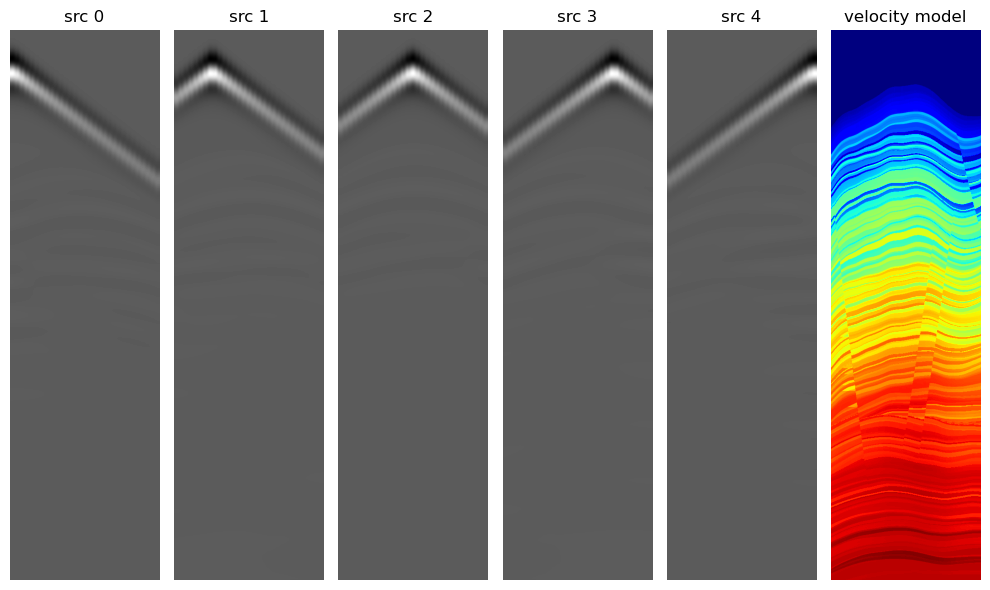

In [7]:
# Plot one dataset sample
sample_path = sample_paths[0]

source_coordinates = [1, 75, 150, 225, 300]

f, ax = plt.subplots(1, 6, figsize=(10, 6))

for i, s in enumerate(source_coordinates):
    rec_data = np.load(os.path.join(sample_path, f"receiver_data_src_{s}.npy"))
    ax[i].imshow(rec_data, cmap="gray", aspect="auto")
    ax[i].set_title(f"src {i}")
    ax[i].axis("off")

target_data = np.load(os.path.join(sample_path, "vp_model.npy"))
ax[-1].imshow(target_data.T, cmap="jet", aspect="auto")
ax[-1].set_title("velocity model")
ax[-1].axis("off")

plt.tight_layout()
plt.show()

## Your Solution
Your task is summarized below.

**Objective:**  
Develop a model that takes seismic receiver data as input and predicts the corresponding subsurface velocity model.

**Input:**  
- Five 2D NumPy arrays, each with shape **(10001, 31)**  
- These arrays represent receiver data and are of type `numpy.float32`

**Output:**  
- A single 2D NumPy array with shape **(300, 1259)**  
- This array represents the predicted velocity model and **must** be of type `numpy.float64`



# Submission File Format and Instructions


To calculate your score on the predictive leaderboard, your submission must be an `.npz` file containing **150 arrays**, each representing a predicted velocity model for a test sample.

- **Array Naming:** Each array should be named using the **sample ID** from the test dataset.  
  (As explained earlier, sample IDs are the names of the folders containing the corresponding test data.)
- **Array Content:** Each array should be your model's predicted **velocity model** for that sample.
- **Data Type:** All arrays must be of type `numpy.float64`.
- **File Structure:** Your `.npz` file must contain **exactly 150 items**, one for each test sample.

---

### Creating the Submission File

To help you generate the `.npz` submission file, we provide a utility function called `create_submission()` in the `utils.py` module. This function accepts:
- A **sample ID** (as a string)
- A **velocity model array** (as a NumPy array)

You can use this function in a loop to populate your submission file with predictions for all 150 test samples.

> **Important Note:**  
> If you choose not to use the provided `create_submission()` function, ensure that your `.npz` file strictly follows the required format. A sample submission file is also provided for reference.

---

### Demonstration

Below, we demonstrate how to use the `create_submission()` function in combination with a dummy prediction function, `dummy_prediction()`, to generate a sample submission file.  
For demonstration purposes, this example uses only **4 test samples**.


In [8]:
test_dataset = "./data/test/*"  # 'path to your test data'
sample_paths = glob(test_dataset)
print("Number of test samples:", len(sample_paths))

for sample_path in sample_paths:

    sample_id = sample_path.split("/")[-1]
    print("\nSample ID:", sample_id)

    # Load input data
    source_coordinates = [1, 75, 150, 225, 300]
    rec_data = [
        np.load(os.path.join(sample_path, f"receiver_data_src_{i}.npy"))
        for i in source_coordinates
    ]

    # Generates a dummy velocity model prediction.
    # This line should be changed to your actual trained model for velocity model prediction
    prediction = dummy_prediction(rec_data, output_shape=(300, 1259))
    print("Prediction shape:", prediction.shape)

    # this line creates/update the submission .npz file and populates it with sample IDs and velocity model prediction
    create_submission(
        sample_id, prediction, "speed-and-structure-dummy-submission1.npz"
    )

Number of test samples: 4

Sample ID: 0yONYjTWNAfKjAilsA
Prediction shape: (300, 1259)

Sample ID: 1jXPNR2ab7iMuw5FS0
Prediction shape: (300, 1259)

Sample ID: 0BFqBxnVIT368FwmdR
Prediction shape: (300, 1259)

Sample ID: 1bxHtxAYD1Kc9Rfz1T
Prediction shape: (300, 1259)


# Evaluation Metric: Mean Absolute Percentage Error (MAPE)

Model performance is evaluated using the **Mean Absolute Percentage Error (MAPE)**. For each test sample, MAPE is computed between your predicted velocity model and the ground-truth model using the following formula:

$$
\text{MAPE} = \frac{1}{N} \sum_{i,j} \left| \frac{g(i,j) - p(i,j)}{g(i,j)} \right|
$$

Where:
- $N$ is the total number of elements in the velocity model array  
- $g(i,j)$ is the ground-truth velocity at position $(i, j)$  
- $p(i,j)$ is the predicted velocity at the same position  
- Note: $g(i,j) > 0$ for all $(i, j)$

After computing MAPE for each of the 150 test samples, the final leaderboard score is obtained by averaging the MAPE values across all samples.

---

### Utility Functions for Evaluation

To help you better understand how your predictive leaderboard score is calculated, two utility functions are provided in the `utils.py` module:

1. **`calculate_mape()`**  
   Computes the MAPE for a single sample, given the ground-truth and predicted velocity models.

2. **`calculate_score()`**  
   Accepts the ground-truth and submission `.npz` files, calculates the MAPE for each sample, and returns the average MAPE as your final score.

---

### Demonstration

Below, we demonstrate the use of `calculate_score()` by applying it to two dummy `.npz` submission files. These files were generated using the loop described earlier. One file is treated as the ground-truth, and the other as the prediction.


In [9]:
answerkey_file = "./speed-and-structure-dummy-submission1.npz"
submission_file = "./speed-and-structure-dummy-submission2.npz"

calculate_score(answerkey_file, submission_file)

0.603278655387954

And the error will obviously be zero if the ground-truth and prediction arrays are exactly the same!

In [10]:
calculate_score(answerkey_file, answerkey_file)

0.0

# Submission Requirements and Guidelines for Smooth Evaluation

To ensure that your submission can be evaluated smoothly and efficiently, please follow these guidelines. Adhering to these best practices will help us run your code without issues and will also reflect positively on your submission. Failure to comply with these best practices may result in disqualification or delays in the evaluation of your submission.

#### 1. Documentation
- **README Files**: Include a README.md file that provides an overview of your project, instructions on how to run your code, and any other relevant information.
- **Docstrings**: Ensure that all functions and classes have clear and concise docstrings explaining their purpose and usage.
- **Markdown Cells**: Use markdown cells in your Jupyter Notebook to explain the steps of your workflow, the rationale behind your choices, and any important details.

#### 2. Environment Management
- **Document the Environment**: Clearly document the computing environment, including the operating system, Python version, and any other relevant details.
- **Dependencies**: Provide a detailed list of all required libraries and their versions in a `requirements.txt` file.
- **Reproducibility**: Before submission, create a clean environment using your `requirements.txt` file and ensure that your code runs without errors in this environment.

#### 3. Folder Organization and Code Modularity
- **Folder Structure**: Organize your project files logically. Separate scripts, data, models, and documentation into distinct folders.
- **Modular Code**: Write modular code by separating different stages of your workflow (e.g., data loading, preprocessing, training, inference) into distinct functions or modules.
- **Avoid Hard-Coding Paths**: Avoid hard-coding paths, especially data paths. Use variables for data path or configuration files to specify paths, ensuring that your code can run on different machines without modification.

#### 4. Workflow Orchestration
- **Main Script**: Use a main Jupyter Notebook to orchestrate the workflow. This Notebook should call the necessary functions or modules in the correct order and provide a clear overview of the entire process.

#### 5. Model Checkpoints
- **Save Checkpoints**: Save and include trained model checkpoints in your submission.
- **Instructions**: Provide clear instructions on how to save, load, and use the model checkpoints, preferably in your README.md file.

#### 6. Double-Check Files
- **Include Necessary Files**: Ensure that all necessary files are included in your submission. This includes the license, notebook, `requirements.txt`, model checkpoints, and any other essential files.
- **Exclude Unnecessary Files**: Exclude unnecessary files such as training and test data to keep your submission clean and focused, and smaller in size.


# Final Evaluation Criteria

If you are selected to send your code and files for the final evaluation, 90% of your final score will be based on your model's MAPE score on the private holdout dataset. The remaining 10% will depend on how well you follow the above-mentioned guidelines. This means that thorough documentation, proper environment management, good folder organization, modular code, and the inclusion of all necessary files are crucial for your success.


To highlight and encourage innovation in this challenge, we are offering **two honorable mentions**—each accompanied by **prize money**—for the **top two most novel and valid approaches** submitted. These awards aim to recognize creative strategies that go beyond conventional solutions, regardless of leaderboard ranking.


By strictly following these guidelines, you will help us evaluate your submission more effectively and increase the chances of your work being recognized. Non-compliance with these requirements may lead to your submission being rejected or not evaluated properly. <b>Thank you for your attention to details and good luck with the challenge!</b>